## Análise e interpretação dos dados fornecidos para o projeto final

### Importando bibliotecas que serão usadas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt

### Leitura e visualização dos datasets

In [2]:
df1 = pd.read_csv('../data/estaticos_portfolio1.csv',index_col = 0)
df2 = pd.read_csv('../data/estaticos_portfolio2.csv',index_col = 0)
df3 = pd.read_csv('../data/estaticos_portfolio3.csv',index_col = 0)
mkt = pd.read_csv('../data/estaticos_market.csv',index_col = 0)

In [3]:
## numero de entradas
mkt.shape

(462298, 181)

In [4]:
## corpo do dataset
df1.head()

,id,fl_matriz,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_empresa_anos,idade_emp_cat,fl_me,...,media_meses_servicos,max_meses_servicos,min_meses_servicos,qt_funcionarios,qt_funcionarios_12meses,qt_funcionarios_24meses,tx_crescimento_12meses,tx_crescimento_24meses,tx_rotatividade,qt_filiais
0,dabe79bec87c88ae04e869bf6bd321ee5e1893cecf6625...,True,EMPRESARIO INDIVIDUAL,PI,OUTROS,COMERCIO VAREJISTA,COMERCIO,0.646575,<= 1,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,32e5f4e10932153a7ba869cb0386e7e02d49d2461046b8...,False,EMPRESARIO INDIVIDUAL,MA,OUTROS,COMERCIO VAREJISTA,COMERCIO,6.586301,5 a 10,False,...,NaN,NaN,NaN,0.0,0.0,2.0,NaN,-100.0,0.0,4
2,a95d6f30bba445bd3d6b0c5b36f865b38ec01d17336090...,True,EMPRESARIO INDIVIDUAL,MA,OUTROS,COMERCIO VAREJISTA,COMERCIO,8.010959,5 a 10,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,6cb309685cea0b6d2988818792ec2e6fcb2bd02e0afa9e...,True,EMPRESARIO INDIVIDUAL,RN,OUTROS,COMERCIO VAREJISTA,COMERCIO,20.863014,> 20,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,f72aa7fa6787b0a5a1c88885b6120850df8ee0f71adc25...,True,SOCIEDADE EMPRESARIA LIMITADA,RN,ENTIDADES EMPRESARIAIS,COMERCIO VAREJISTA,COMERCIO,18.726027,15 a 20,False,...,39.454762,91.2,19.333333,14.0,15.0,25.0,-6.666667,-44.0,0.0,3


### Verificando o número de registros faltantes em cada variável

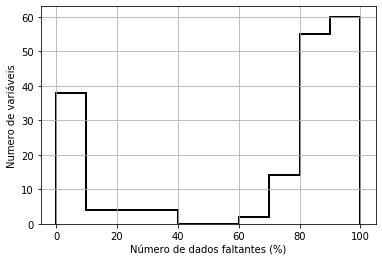

In [5]:
plt.hist(100*(df1.isnull().sum())/df1.shape[0],bins = 10,histtype='step',color = 'black',linewidth = 2.)
plt.xlabel('Número de dados faltantes (%)')
plt.ylabel('Numero de variáveis')
plt.grid()

### Como primeiro passo, eliminarei as variáveis com 95% dos dados faltantes (não faz sentido trabalhar com um parâmetro que quase não possui estatística). Coloquei a porcentagem de corte como ajustável, logo podemos aumentar ou diminuir esse threshold.

In [6]:
threshold = 0.95   ## pegar colunas maior que 95%
nan_num   = (df1.isnull().sum())/df1.shape[0]  ## calculo da porcentagem de registros null para cada coluna
var_nans  = df1.columns[nan_num>=threshold] ## pega nome das colunas maiores que a porcentagem definida
print('Variaveis que serão removidas total:'+str(var_nans.shape[0])+'\n ',var_nans)

Variaveis que serão removidas total:36
  Index(['vl_total_tancagem', 'vl_total_veiculos_antt', 'qt_art',
       'vl_total_tancagem_grupo', 'vl_total_veiculos_antt_grupo',
       'vl_potenc_cons_oleo_gas', 'qt_socios_st_suspensa', 'qt_socios_pep',
       'qt_alteracao_socio_total', 'qt_alteracao_socio_90d',
       'qt_alteracao_socio_180d', 'qt_alteracao_socio_365d',
       'qt_socios_pj_ativos', 'qt_socios_pj_nulos', 'qt_socios_pj_baixados',
       'qt_socios_pj_suspensos', 'qt_socios_pj_inaptos',
       'vl_idade_media_socios_pj', 'vl_idade_maxima_socios_pj',
       'vl_idade_minima_socios_pj', 'coligada_mais_nova_baixada',
       'coligada_mais_antiga_baixada', 'idade_media_coligadas_baixadas',
       'total_filiais_coligados', 'media_filiais_coligados',
       'max_filiais_coligados', 'min_filiais_coligados', 'idade_ate_18',
       'idade_de_44_a_48', 'idade_de_49_a_53', 'idade_de_54_a_58',
       'idade_acima_de_58', 'grau_instrucao_macro_analfabeto',
       'grau_instrucao_macro_e

### Removendo váriaveis 

In [7]:
mkt.drop(labels=var_nans,axis=1,inplace=True)    

In [8]:
## Database com features removidas
mkt.shape

(462298, 145)

### Análise das features numéricas

In [9]:
mkt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 462298 entries, 0 to 462297
Columns: 145 entries, id to qt_filiais
dtypes: bool(9), float64(108), int64(1), object(27)
memory usage: 487.2+ MB


In [10]:
## Pegando somente colunas numéricas
numerics = ['bool', 'float64', 'int64']
mkt_num  = mkt.select_dtypes(include=numerics)
mkt_num.shape

(462298, 118)

In [11]:
mkt_num.head()

,fl_matriz,idade_empresa_anos,fl_me,fl_sa,fl_epp,fl_mei,fl_ltda,fl_st_especial,fl_email,fl_telefone,...,media_meses_servicos,max_meses_servicos,min_meses_servicos,qt_funcionarios,qt_funcionarios_12meses,qt_funcionarios_24meses,tx_crescimento_12meses,tx_crescimento_24meses,tx_rotatividade,qt_filiais
0,True,14.457534,False,False,False,False,False,False,True,True,...,43.738462,93.266667,19.166667,26.0,26.0,27.0,0.0,-3.703704,0.0,0
1,True,1.463014,False,False,False,True,False,False,True,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,True,7.093151,False,False,False,True,False,False,False,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,True,6.512329,False,False,False,False,False,False,True,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,True,3.200000,False,False,False,False,False,False,True,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [ ]:
## Verificando se há alguma coluna com valor constante -> demorando pakas preciso saber oq ta rolando
mkt.std(axis = 1) == 0

## Minha proxima pergunta é se um cliente pode estar no portifolio de mais de uma empresa

In [12]:
def buscaID(id_tag,df):
    return sum(df['id'] == id_tag)

In [34]:
id12  = sum([buscaID(df1['id'][i],df2) for i in range(0,df1.shape[0])])
id13  = sum([buscaID(df1['id'][i],df3) for i in range(0,df1.shape[0])])
id23  = sum([buscaID(df2['id'][i],df3) for i in range(0,df2.shape[0])])

print('empresas 1 e 2 compartilham de ' + str(id12) + ' clientes')
print('empresas 1 e 3 compartilham de ' + str(id13) + ' clientes')
print('empresas 2 e 3 compartilham de ' + str(id23) + ' clientes')

empresas 1 e 2 compartilham de 0 clientes
empresas 1 e 3 compartilham de 0 clientes
empresas 2 e 3 compartilham de 108 clientes
